**常规线性回归**
$$h(x) = x^{T}\hat{\beta}$$
<br>
$$\hat{\beta} = \underset{\beta}{argmin}\sum_{x,y}(y-x^{T}\beta)^{2}$$
<br>
求解得到$\hat{\beta}$：
$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$
<br>
**局部加权线性回归**
$$h(x_{0} = x_{0}^{T}\hat{\beta}(x_{0})$$
<br>
$$\hat{\beta}(x_{0}) = \underset{\beta}{argmin}\sum_{x,y}w_{(x, x_{0})}(y-x^{T}\beta)^{2}$$
<br>
$$w_{(x, x_{0})} = e^{-\frac{(x-x_{0})^{2}}{2\tau^{2}}}$$
<br>
求解得到$\hat{\beta}(x_{0})$：
$$\hat{\beta}(x_{0}) = (X^{T}WX)^{-1}X^{T}Wy$$

In [1]:
import pandas as pd
import numpy as np

### 加载数据

In [3]:
df = pd.read_csv('../machinelearninginaction-master/Ch08/ex0.txt', header=None, sep='\t', names = ['X1','X2', 'y'])
df.head(3)

,X1,X2,y
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095


In [4]:
df.X1.unique()

array([ 1.])

In [5]:
X_data = np.asarray(df[['X1','X2']])
y_data = np.asanyarray(df['y'])

In [6]:
X_data.shape

(200, 2)

In [8]:
y_data.shape

(200,)

### 局部加权回归

In [18]:
def lwlr(test_point, x_arr, y_arr, k=1.0):
    x_mat = np.mat(x_arr)
    y_mat = np.mat(y_arr).T
    m = np.shape(x_arr)[0]
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff_mat = test_point - x_mat[j,:]
        weights[j,j] = np.exp(diff_mat*diff_mat.T/(-2.0*k**2))
    xTx = x_mat.T*(weights*x_mat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cann not do inverse")
        return
    ws = xTx.I * (x_mat.T*(weights*y_mat))
    return test_point*ws

In [15]:
def lwlr_test(test_arr, x_arr, y_arr, k=1.0):
    m = np.shape(test_arr)[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = lwlr(test_arr[i], x_arr, y_arr, k)
    return y_hat

In [19]:
lwlr(X_data[0], X_data, y_data, 1.0)

matrix([[ 3.12204471]])

In [20]:
y_data[0]

3.1765129999999999

In [21]:
# 预测数据集的所有估计
y_hat = lwlr_test(X_data, X_data, y_data, 0.003)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wei\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


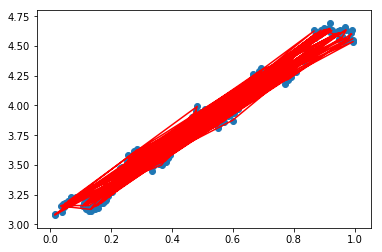

In [25]:
plt.plot(X_data[:,1], y_hat, c='r')
plt.scatter( X_data[:,1], y_data);

In [26]:
# 需要排序
srt_ind = X_data[:,1].argsort(0)

In [29]:
X_sort = X_data[srt_ind]

C:\Users\wei\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


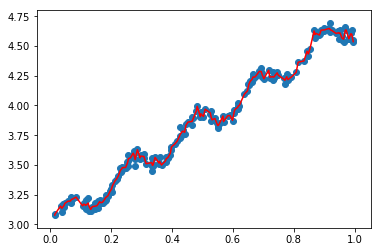

In [32]:
plt.plot(X_sort[:,1], y_hat[srt_ind], c='r')
plt.scatter( X_data[:,1], y_data);

In [33]:
y_hat_1pct = lwlr_test(X_data, X_data, y_data, 0.01)
y_hat_100pct = lwlr_test(X_data, X_data, y_data, 1)

C:\Users\wei\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\wei\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


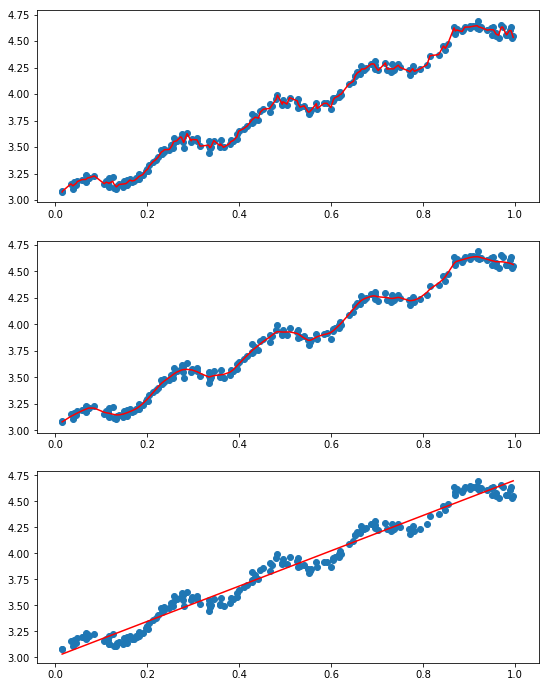

In [53]:
fig = plt.figure(figsize=(9, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.scatter( X_data[:,1], y_data)
ax1.plot(X_sort[:,1], y_hat[srt_ind], c='r', label='tau=0.003')
# plt.legend()


ax2.scatter( X_data[:,1], y_data)
ax2.plot(X_sort[:,1], y_hat_1pct[srt_ind], c='r')

ax3.scatter( X_data[:,1], y_data)
ax3.plot(X_sort[:,1], y_hat_100pct[srt_ind], c='r')
plt.legend()